In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime

In [3]:
df=pd.read_csv('Total.csv',index_col=False,)
del df['Unnamed: 0']
df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')
df['DateTime']=pd.to_datetime(df['Date'] + ' ' + df['Time'])
df


,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date,DateTime
0,00:00:00,79,75,89,3,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 00:00:00
1,00:30:00,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 00:30:00
2,01:00:00,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 01:00:00
3,01:30:00,77,75,94,1,5,0 mph,29.85,0.0 in,2022-11-05,2022-11-05 01:30:00
4,02:00:00,75,75,100,1,6,0 mph,29.85,0.0 in,2022-11-05,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4573,21:30:00,81,77,89,14,1,0 mph,29.73,0.0 in,2022-08-02,2022-08-02 21:30:00
4574,22:00:00,81,77,89,13,3,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 22:00:00
4575,22:30:00,81,77,89,13,5,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 22:30:00
4576,23:00:00,81,77,89,13,6,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 23:00:00


In [4]:
# df['DateTime'] = pd.to_datetime(df['DateTime']).dt.strftime('%Y-%M-%D %H:%M:%S')
del df['Time']
del df['Date']

In [5]:
df.dtypes

Temperature             int64
Dew Point               int64
Humidity                int64
Wind                    int64
Wind Speed              int64
Wind Gust              object
Pressure              float64
Precip.                object
DateTime       datetime64[ns]
dtype: object

In [6]:
df

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,DateTime
0,79,75,89,3,6,0 mph,29.88,0.0 in,2022-11-05 00:00:00
1,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05 00:30:00
2,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05 01:00:00
3,77,75,94,1,5,0 mph,29.85,0.0 in,2022-11-05 01:30:00
4,75,75,100,1,6,0 mph,29.85,0.0 in,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...
4573,81,77,89,14,1,0 mph,29.73,0.0 in,2022-08-02 21:30:00
4574,81,77,89,13,3,0 mph,29.76,0.0 in,2022-08-02 22:00:00
4575,81,77,89,13,5,0 mph,29.76,0.0 in,2022-08-02 22:30:00
4576,81,77,89,13,6,0 mph,29.76,0.0 in,2022-08-02 23:00:00


In [7]:
df=df.set_index('DateTime')

In [8]:
df=df.sort_index()

In [9]:
tem_df=df[['Temperature']]
# tem_df.isnull().sum()

In [10]:
print(tem_df.notnull().count())

Temperature    4578
dtype: int64


In [11]:
tem_df

,Temperature
DateTime,
2022-08-02 00:00:00,81
2022-08-02 00:30:00,81
2022-08-02 01:00:00,81
2022-08-02 01:30:00,81
2022-08-02 02:00:00,81
...,...
2022-11-05 10:00:00,86
2022-11-05 10:30:00,86
2022-11-05 11:00:00,88


In [12]:
tem_df.values

array([[81],
       [81],
       [81],
       ...,
       [88],
       [88],
       [90]], dtype=int64)

In [13]:
#Chuyển sang độ C
tem_df['Temperature']=round((tem_df['Temperature']-32)*5/9,1)

C:\Users\Vungo\AppData\Local\Temp\ipykernel_1888\2020197651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem_df['Temperature']=round((tem_df['Temperature']-32)*5/9,1)


In [14]:
tem_df

,Temperature
DateTime,
2022-08-02 00:00:00,27.2
2022-08-02 00:30:00,27.2
2022-08-02 01:00:00,27.2
2022-08-02 01:30:00,27.2
2022-08-02 02:00:00,27.2
...,...
2022-11-05 10:00:00,30.0
2022-11-05 10:30:00,30.0
2022-11-05 11:00:00,31.1


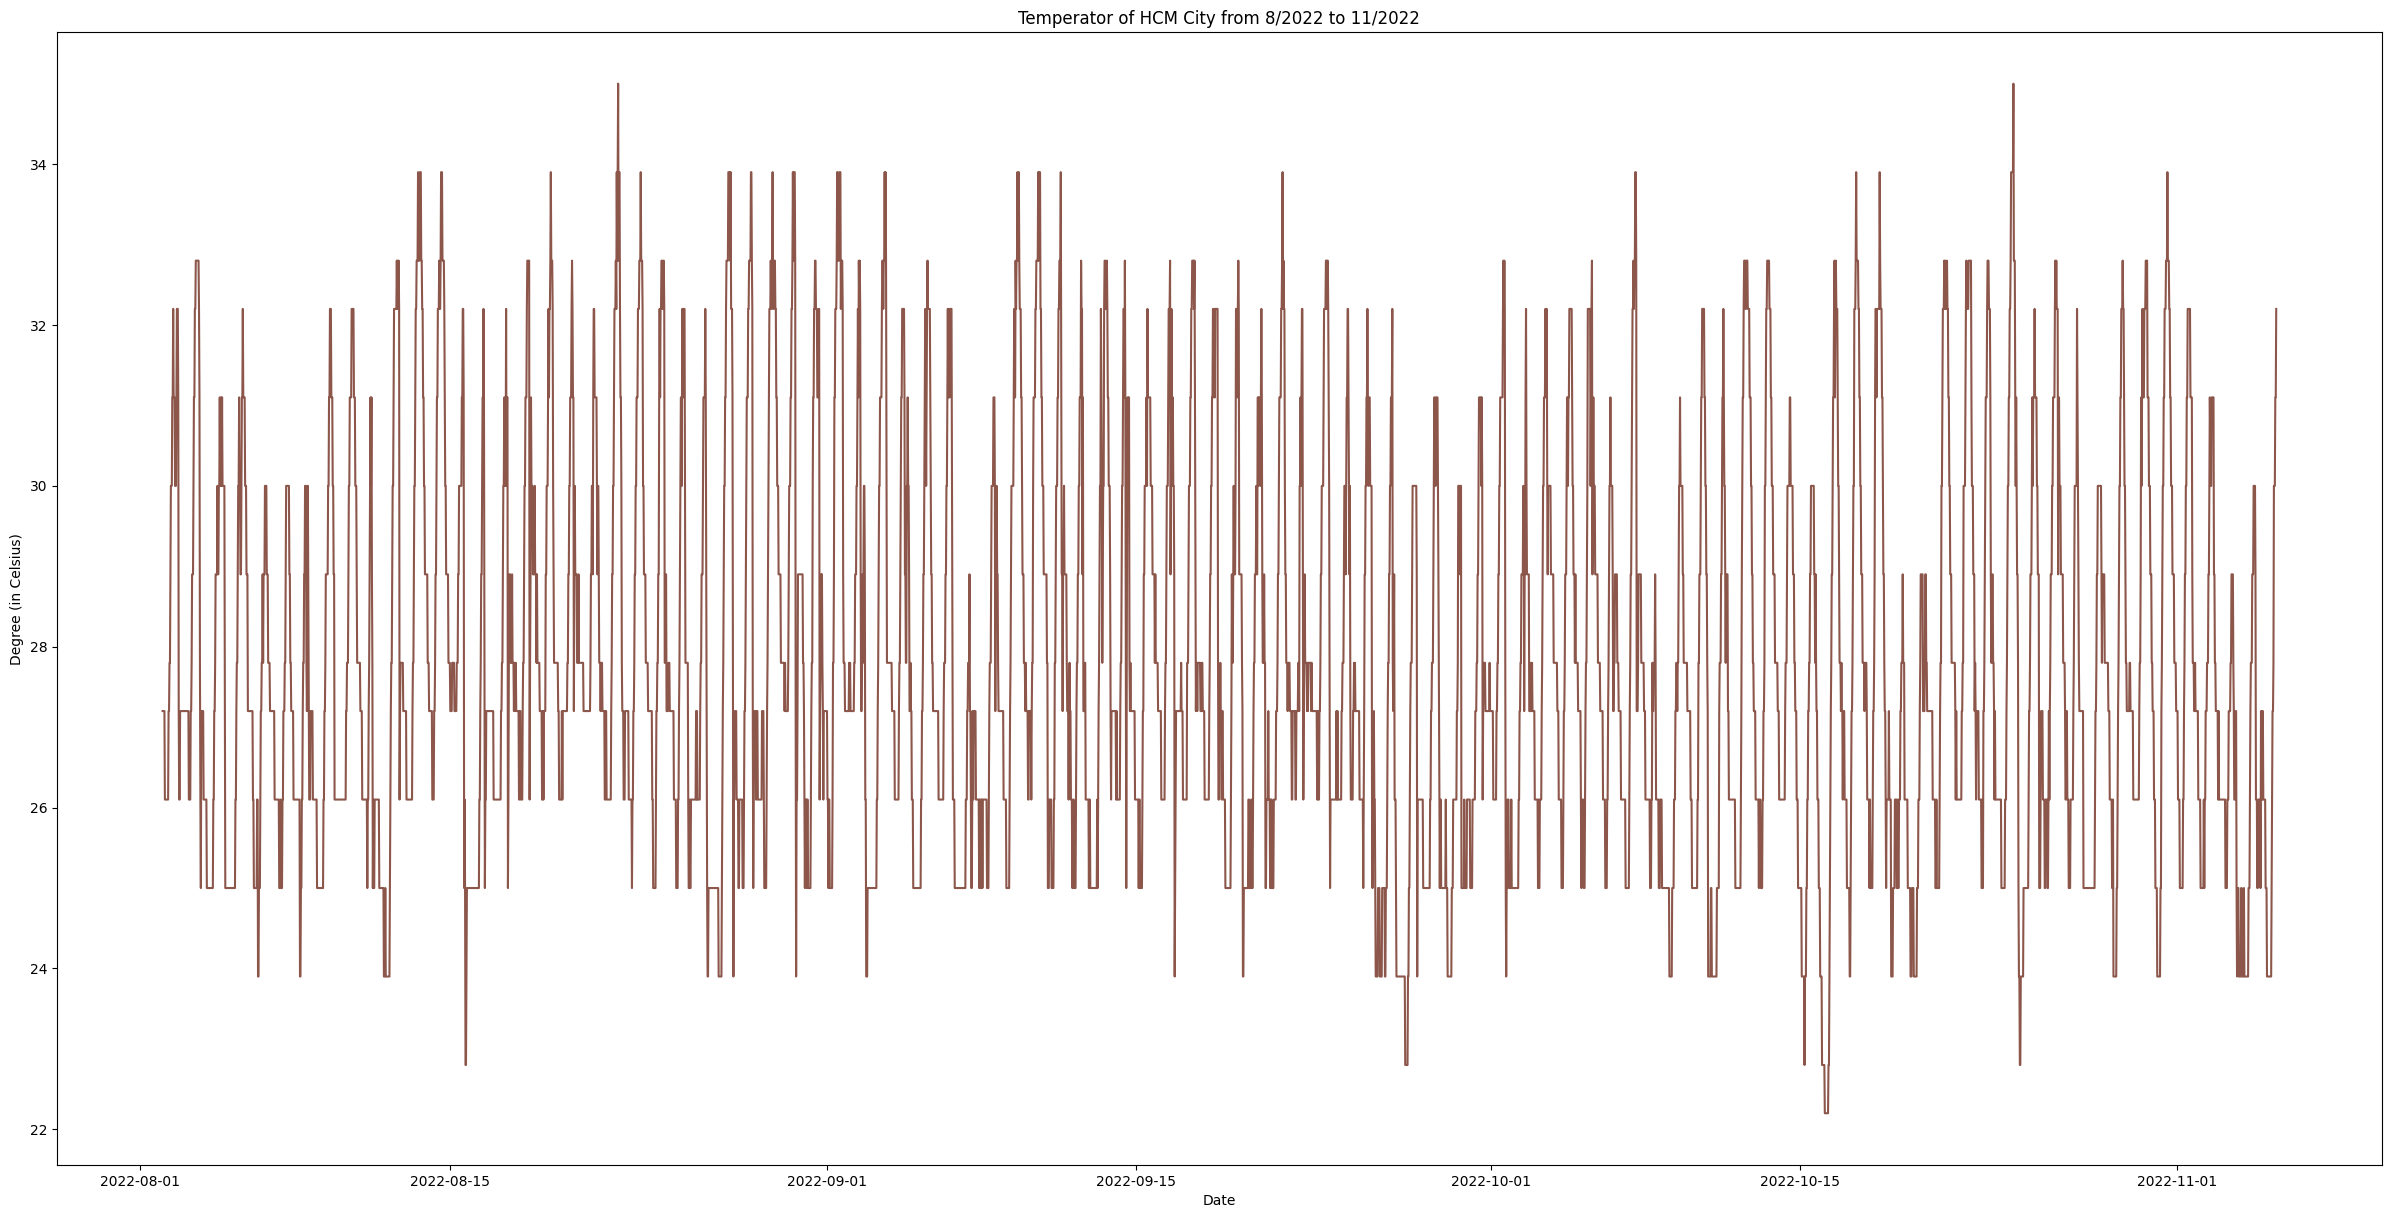

In [15]:
# tem_df["Temperature"].max()
# tem_df["Temperature"].min()
plt.figure(figsize=(30,15), dpi=100)
plt.plot(tem_df.index, tem_df.Temperature, color='tab:brown')
plt.gca().set(title="Temperator of HCM City from 8/2022 to 11/2022", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

<AxesSubplot:xlabel='DateTime'>

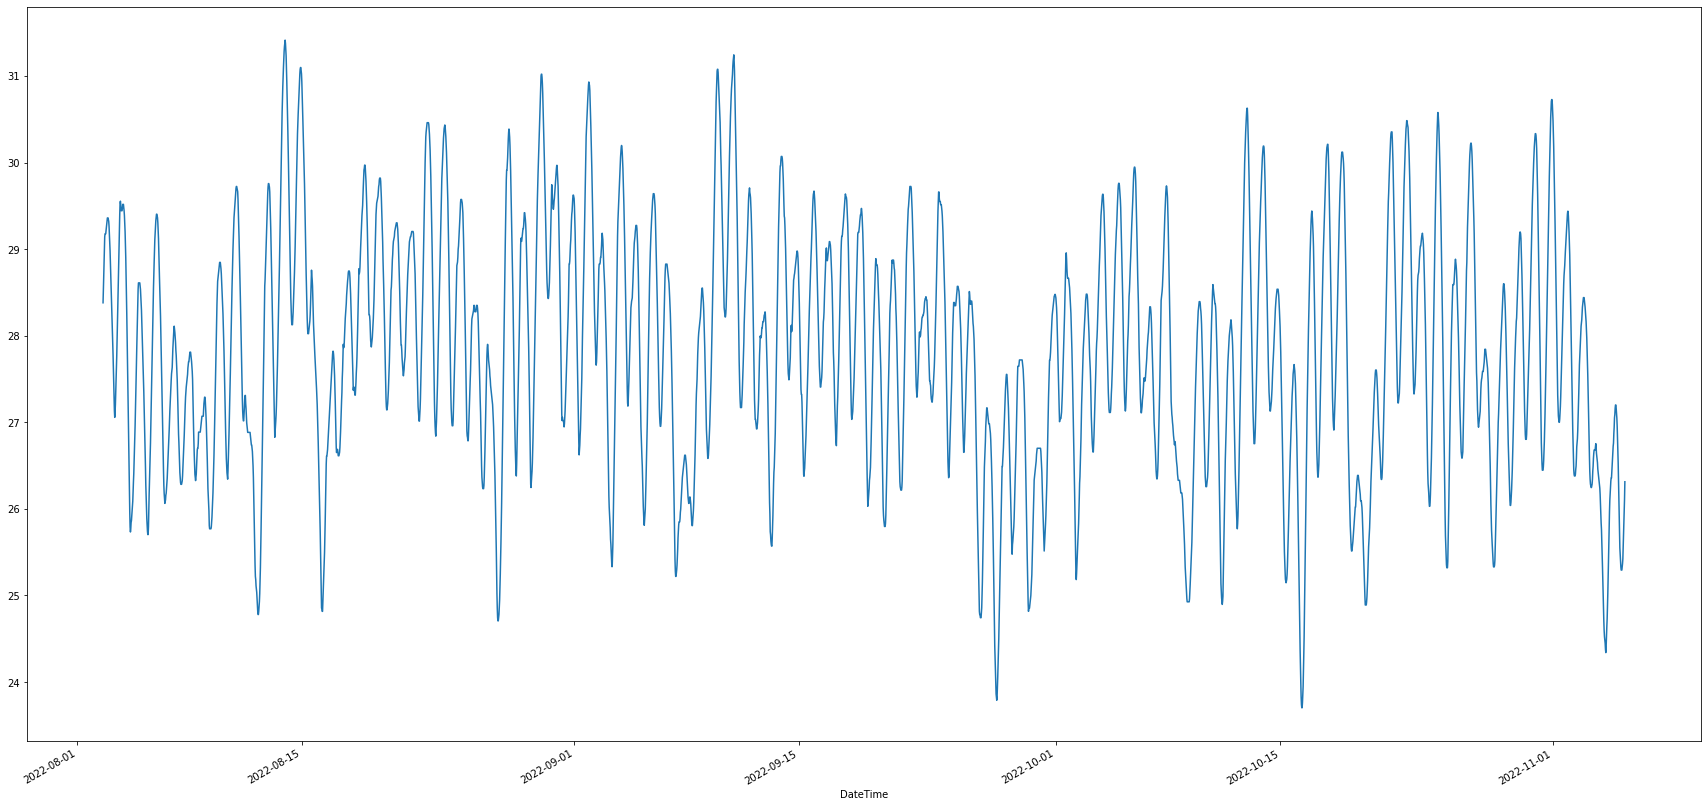

In [16]:
# Apply the Moving Average function by a subset of size 30 days.
tem_df_mean = tem_df.Temperature.rolling(window=30).mean()
tem_df_mean.plot(figsize=(30,15))

In [17]:
tem_df.squeeze()

DateTime
2022-08-02 00:00:00    27.2
2022-08-02 00:30:00    27.2
2022-08-02 01:00:00    27.2
2022-08-02 01:30:00    27.2
2022-08-02 02:00:00    27.2
                       ... 
2022-11-05 10:00:00    30.0
2022-11-05 10:30:00    30.0
2022-11-05 11:00:00    31.1
2022-11-05 11:30:00    31.1
2022-11-05 12:00:00    32.2
Name: Temperature, Length: 4578, dtype: float64

In [18]:
tem_df.Temperature

DateTime
2022-08-02 00:00:00    27.2
2022-08-02 00:30:00    27.2
2022-08-02 01:00:00    27.2
2022-08-02 01:30:00    27.2
2022-08-02 02:00:00    27.2
                       ... 
2022-11-05 10:00:00    30.0
2022-11-05 10:30:00    30.0
2022-11-05 11:00:00    31.1
2022-11-05 11:30:00    31.1
2022-11-05 12:00:00    32.2
Name: Temperature, Length: 4578, dtype: float64

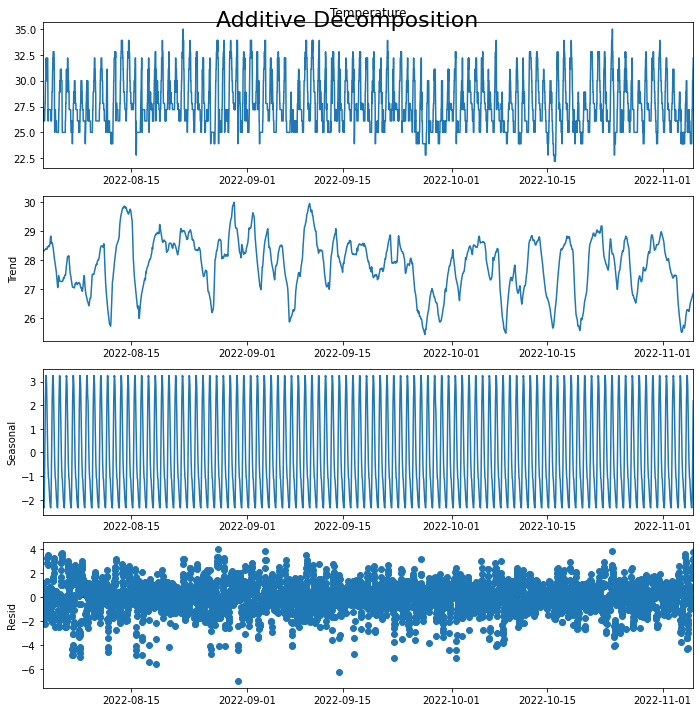

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(tem_df.Temperature, model='additive', extrapolate_trend='freq', period =48)
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

In [20]:
# Shift the current temperature to the next day. 
predicted_df = tem_df["Temperature"].to_frame().shift(1).rename(columns = {"Temperature": "Temperature_pred" })
actual_df = tem_df["Temperature"].to_frame().rename(columns = {"Temperature": "Temperature_actual" })

# Concatenate the actual and predicted temperature
one_step_df = pd.concat([actual_df,predicted_df],axis=1)
# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)


,Temperature_actual,Temperature_pred
DateTime,,
2022-08-02 00:30:00,27.2,27.2
2022-08-02 01:00:00,27.2,27.2
2022-08-02 01:30:00,27.2,27.2
2022-08-02 02:00:00,27.2,27.2
2022-08-02 02:30:00,26.1,27.2
2022-08-02 03:00:00,26.1,26.1
2022-08-02 03:30:00,26.1,26.1
2022-08-02 04:00:00,26.1,26.1
2022-08-02 04:30:00,26.1,26.1


In [21]:
one_step_df.head(20)

,Temperature_actual,Temperature_pred
DateTime,,
2022-08-02 00:30:00,27.2,27.2
2022-08-02 01:00:00,27.2,27.2
2022-08-02 01:30:00,27.2,27.2
2022-08-02 02:00:00,27.2,27.2
2022-08-02 02:30:00,26.1,27.2
2022-08-02 03:00:00,26.1,26.1
2022-08-02 03:30:00,26.1,26.1
2022-08-02 04:00:00,26.1,26.1
2022-08-02 04:30:00,26.1,26.1


In [22]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.Temperature_actual, one_step_df.Temperature_pred, squared=False)
print("The RMSE is",temp_pred_err)

The RMSE is 0.8126969266067509


In [23]:
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [25]:
#Fitting the model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.Temperature_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

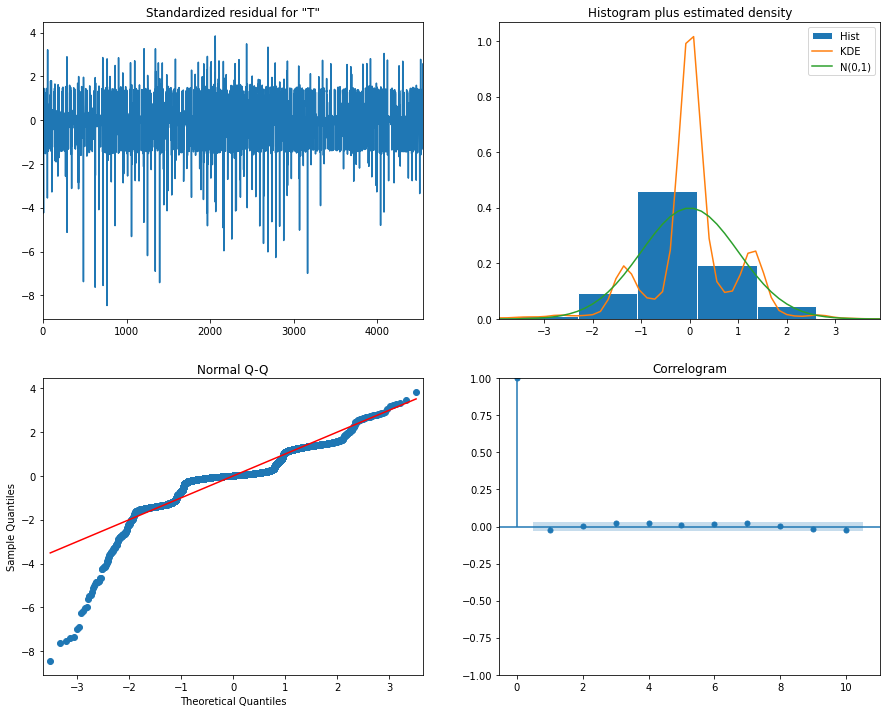

In [26]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [52]:
pred = results.get_prediction(start=pd.to_datetime('2022-10-15 9:00:00'), dynamic=False)
pred_ci = pred.conf_int()

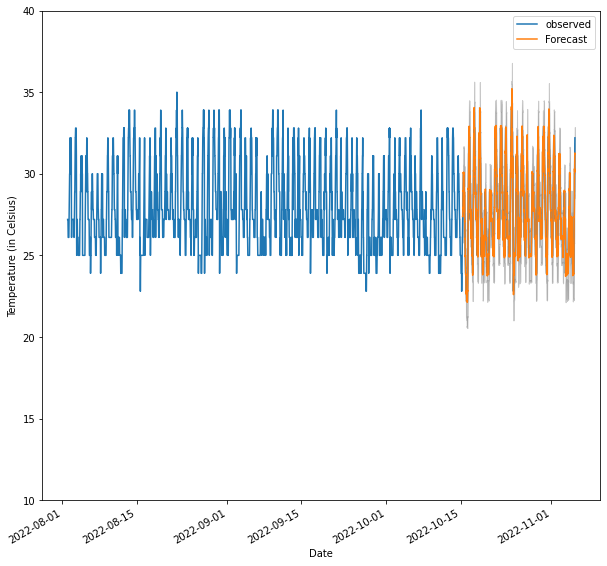

In [53]:
ax = one_step_df.Temperature_actual['2022-08-02 00:30:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([10,40])
plt.legend()
plt.show()

In [54]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.Temperature_actual['2022-10-15 9:00:00':]
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(1013,)
(1013,)
The Mean Squared Error of our forecasts is 0.5


In [55]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2022-10-15 9:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [56]:
pred_dynamic_ci

,lower Temperature_actual,upper Temperature_actual
DateTime,,
2022-10-15 09:00:00,25.796822,28.969869
2022-10-15 09:30:00,25.242091,29.888262
2022-10-15 10:00:00,24.747445,30.602909
2022-10-15 10:30:00,24.327150,31.250486
2022-10-15 11:00:00,23.827501,31.722380
...,...,...
2022-11-05 10:00:00,-50.815826,105.804368
2022-11-05 10:30:00,-50.793179,105.935616
2022-11-05 11:00:00,-50.816978,106.020367


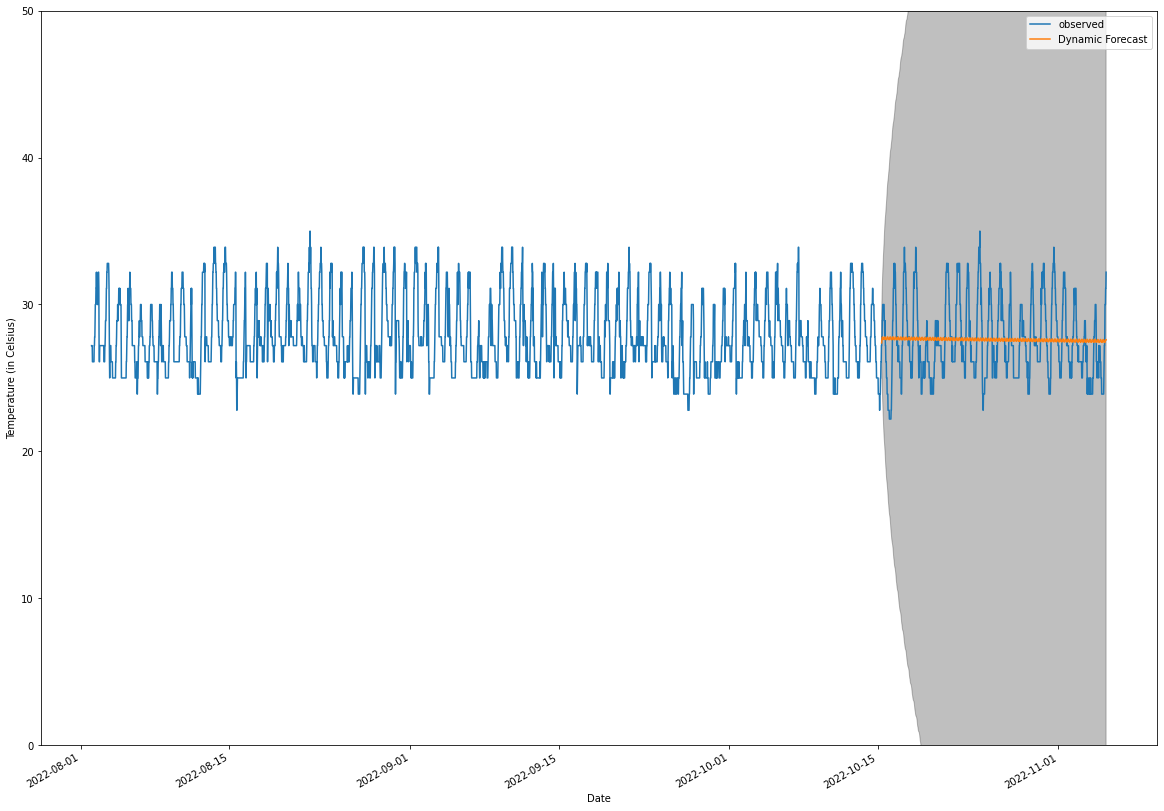

In [57]:
ax = one_step_df.Temperature_actual['2022-08-02 00:30:00':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([0,50])
plt.legend()
plt.show()

In [58]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = one_step_df.Temperature_actual['2022-10-15 9:00:00':]

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 2.67


In [59]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import RMSprop
from keras.callbacks import Callback

In [60]:
def plot_train_points(label='Temperature',Tp=3000):
    plt.figure(figsize=(15,4))
    if label=='Temperature':
        plt.title("Temperature of first {} data points".format(Tp),fontsize=16)
        plt.plot(tem_df['Temperature'][:Tp],c='k',lw=1)
    # if label=='temperature':
    #     plt.title("Temperature of first {} data points".format(Tp),fontsize=16)
    #     plt.plot(temp_SF['San Francisco'][:Tp],c='k',lw=1)
    # if label=='pressure':
    #     plt.title("Pressure of first {} data points".format(Tp),fontsize=16)
    #     plt.plot(pressure_SF['San Francisco'][:Tp],c='k',lw=1)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [61]:
tem_df.shape

(4578, 1)

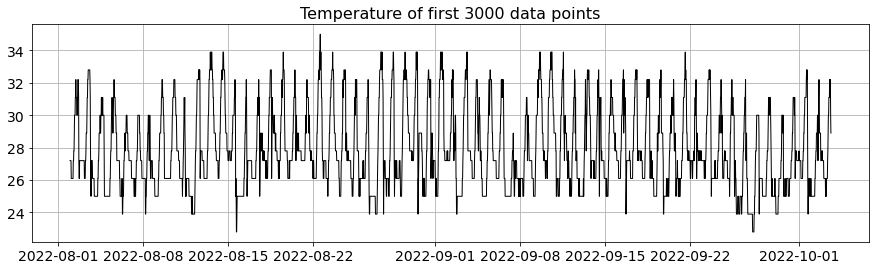

In [62]:
plot_train_points('Temperature',3000)

In [77]:
tem_df.to_csv('tem_df.csv')

In [78]:
tem_df=pd.read_csv('tem_df.csv')

In [79]:
tem_df

,DateTime,Temperature
0,2022-08-02 00:00:00,27.2
1,2022-08-02 00:30:00,27.2
2,2022-08-02 01:00:00,27.2
3,2022-08-02 01:30:00,27.2
4,2022-08-02 02:00:00,27.2
...,...,...
4573,2022-11-05 10:00:00,30.0
4574,2022-11-05 10:30:00,30.0
4575,2022-11-05 11:00:00,31.1
4576,2022-11-05 11:30:00,31.1


In [80]:
import numpy as np
train = np.array(tem_df['Temperature'][:3000])
test = np.array(tem_df['Temperature'][3000:])

In [81]:
train=train.reshape(-1,1)
test=test.reshape(-1,1)


In [82]:
train

array([[27.2],
       [27.2],
       [27.2],
       ...,
       [32.2],
       [30. ],
       [28.9]])

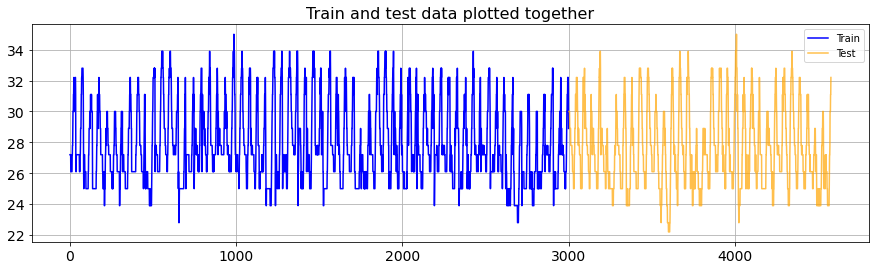

In [84]:
Tp=3000
plt.figure(figsize=(15,4))
plt.title("Train and test data plotted together",fontsize=16)
plt.plot(np.arange(Tp),train,c='blue')
plt.plot(np.arange(Tp,4578),test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [85]:
step = 8
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (3008,)
Test data length: (1586,)


Converting to a multi-dimensional array


In [86]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [87]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [88]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [89]:
print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (3000, 1, 8) ,  (3000,)
Test data shape: (1578, 1, 8) ,  (1578,)


Build model

In [90]:
def build_simple_rnn(num_units=128, embedding=4,num_dense=32,lr=0.001):
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of a the simple RNN layer
              embedding: Embedding length
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              lr: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=lr),metrics=['mse'])
    
    return model

In [92]:
model_temperature = build_simple_rnn(num_units=128,num_dense=32,embedding=8,lr=0.0005)
model_temperature.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               17536     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,697
Trainable params: 21,697
Non-trainable params: 0
_________________________________________________________________


In [98]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

In [99]:
batch_size=8
num_epochs = 100

In [100]:
model_temperature.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[MyCallback()],verbose=0)

Epoch number 50 done
Epoch number 100 done


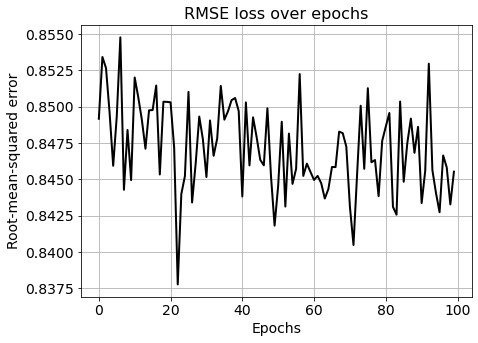

In [101]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model_temperature.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

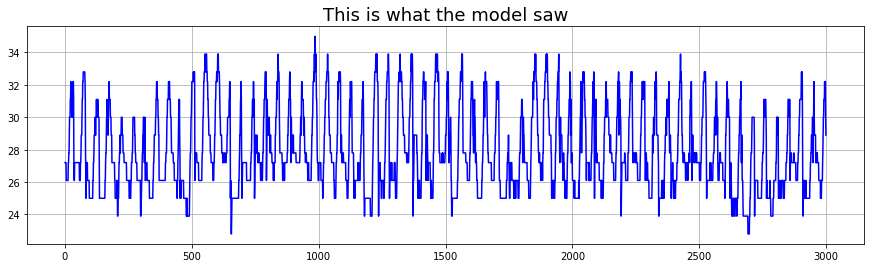

In [102]:
plt.figure(figsize=(15,4))
plt.title("This is what the model saw",fontsize=18)
plt.plot(trainX[:,0][:,0],c='blue')
plt.grid(True)
plt.show()

In [103]:
trainPredict = model_temperature.predict(trainX)
testPredict= model_temperature.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

50/50 [==============================] - 2s 12ms/step


In [112]:
testX

array([[[30. , 30. , 30. , ..., 30. , 28.9, 28.9]],

       [[30. , 30. , 30. , ..., 28.9, 28.9, 28.9]],

       [[30. , 30. , 30. , ..., 28.9, 28.9, 28.9]],

       ...,

       [[31.1, 31.1, 32.2, ..., 32.2, 32.2, 32.2]],

       [[31.1, 32.2, 32.2, ..., 32.2, 32.2, 32.2]],

       [[32.2, 32.2, 32.2, ..., 32.2, 32.2, 32.2]]])

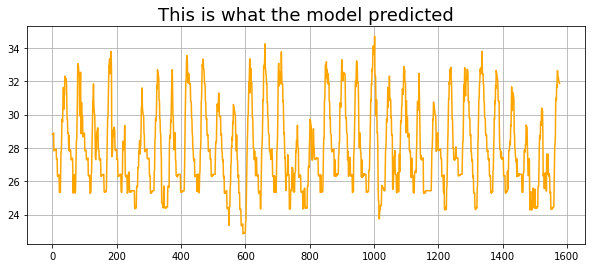

In [104]:
plt.figure(figsize=(10,4))
plt.title("This is what the model predicted",fontsize=18)
plt.plot(testPredict,c='orange')
plt.grid(True)
plt.show()

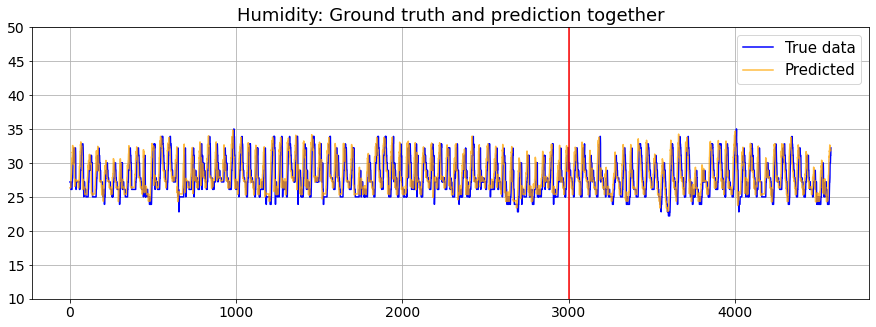

In [113]:
index = tem_df.index.values

plt.figure(figsize=(15,5))
plt.title("Humidity: Ground truth and prediction together",fontsize=18)
plt.plot(index,tem_df['Temperature'],c='blue')
plt.plot(index,predicted,c='orange',alpha=0.75)
plt.legend(['True data','Predicted'],fontsize=15)
plt.axvline(x=Tp, c="r")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(10,50)
plt.show()

In [114]:
tem_df.tail()

,DateTime,Temperature
4573,2022-11-05 10:00:00,30.0
4574,2022-11-05 10:30:00,30.0
4575,2022-11-05 11:00:00,31.1
4576,2022-11-05 11:30:00,31.1
4577,2022-11-05 12:00:00,32.2
